# Indexado, Slicing y operaciones básicas

Vamos a explorar más a fondo la diferentes formas que tenemos de acceder y operar con componentes de un array multidimensional.

In [ ]:
import numpy as np

---
## Indexado y *slicing* 

Otra de las características más interesantes de numpy es la gran flexibilidad para acceder a las componentes de un array, o a un subconjunto del mismo. Vamos a ver a continuación algunos ejemplos básicos.

**Arrays unidimensonales**

Para arrays unidimensionales, el acceso es muy parecido al de listas. Por ejemplo, acceso a las componentes:

In [ ]:
v = np.arange(10)

In [ ]:
v[5]

5

La operación de *slicing* en arrays es similar a la de listas. Por ejemplo:

In [ ]:
v[5:8]

array([12, 12, 12])

Sin embargo, hay una diferencia fundamental: en general en python, el slicing siempre crea *una copia* de la secuencia original (aunque no de los elementos) a la hora de hacer asignaciones. En numpy, el *slicing* es una *vista* de array original. Esto tiene como consecuencia que **las modificaciones que se realicen sobre dicha vista se están realizando sobre el array original**. Por ejemplo:   

In [ ]:
l = list(range(10))
l_slice = l[5:8]
v_slice = v[5:8]
l_slice[:] = [12, 12, 12]
v_slice[:] = 12

In [ ]:
print(l)
print(v)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[ 0  1  2  3  4 12 12 12  8  9]


Y además hay que tener en cuenta que cualquier referencia a una vista es en realidad una referencia a los datos originales, y que las modificaciones que se realicen a través de esa referencia, se realizarán igualmente sobre el original.

Veámos esto con el siguiente ejemplo:

Modificamos la componente 1 de `v_slice`:

In [ ]:
v_slice[1] = 12345
print(v_slice)

[   12 12345    12]


Pero la componente 1 de `C_slice` es en realidad la componente 6 de `C`, así que `C` ha cambiado:

In [ ]:
print(v)

[    0     1     2     3     4    12 12345    12     8     9]


Nótese la diferencia con las listas de python, en las que `l[:]` es la manera estándar de crear una *copia* de una lista `l`. En el caso de *numpy*, si se quiere realizar una copia, se ha de usar el método `copy` (por ejemplo, `C.copy()`).

**Arrays de más dimensiones**

El acceso a los componentes de arrays de dos o más dimensiones es similar, aunque la casuística es más variada.

Cuando accedemos con un único índice, estamos accediendo al correspondiente subarray de esa posición. Por ejemplo, en array de dos dimensiones, con 3 filas y 3 columnas, la posición 2 es la tercera fila:

In [ ]:
C2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C2d[2]

array([7, 8, 9])

De esta manera, recursivamente, podríamos acceder a los componentes individuales de una array de cualquier dimensión. En el ejemplo anterior, el elemento de la primera fila y la tercera columna sería:

In [ ]:
C2d[0][2]

3

Normalmente no se suele usar la notación anterior para acceder a los elementos individuales, sino que se usa un único corchete con los índices separados por comas: Lo siguiente es equivalente:

In [ ]:
C2d[0, 2]

3

Veamos más ejemplos de acceso y modificación en arrays multidimensionales, en este caso con tres dimensiones.

In [ ]:
C3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
C3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Accediendo a la posición 0 obtenemos el correspondiente subarray de dos dimensiones:

In [ ]:
C3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Similar a la función `enumerate` de Python, tenemos la función `np.ndenumearte` para iterar con los elementos del array y su índice

In [ ]:
[i for i in np.ndenumerate(C3d)]

[((0, 0, 0), 1),
 ((0, 0, 1), 2),
 ((0, 0, 2), 3),
 ((0, 1, 0), 4),
 ((0, 1, 1), 5),
 ((0, 1, 2), 6),
 ((1, 0, 0), 7),
 ((1, 0, 1), 8),
 ((1, 0, 2), 9),
 ((1, 1, 0), 10),
 ((1, 1, 1), 11),
 ((1, 1, 2), 12)]

Vamos a guardar una copia de de ese subarray y lo modificamos en el original con el número `42` en todas las posiciones:

In [ ]:
old_values = C3d[0].copy()
C3d[0] = 42
C3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Y ahora reestablecemos los valores originales:

In [ ]:
C3d[0] = old_values
C3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

:::{exercise}
:label: introduction-numpy-indexing

Devuelve el número 813 indexando el array `np.arange(2100).reshape((25, 6, 7, 2))`. 

:::

#### Indexado usando *slices*

In [ ]:
C2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Los *slicings* en arrays multidimensionales se hacen a lo largo de los correspondientes ejes. Por ejemplo, en un array bidimensional, lo haríamos sobre la secuencia de filas. 

In [ ]:
C2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

Pero también podríamos hacerlo en ambos ejes. Por ejemplo para obtener el subarray hasta la segunda fila y a partir de la primera columna:

In [ ]:
C2d[:2, 1:]

array([[2, 3],
       [5, 6]])

Si en alguno de los ejes se usa un índice individual, entonces se pierde una de las dimensiones:

In [ ]:
C2d[1, :2]

array([4, 5])

Nótese la diferencia con la operación `C2d[1:2,:2]`. Puede parecer que el resultado ha de ser el mismo, pero si se usa slicing en ambos ejes se mantiene el número de dimensiones:

In [ ]:
C2d[1:2,:2]

array([[4, 5]])

Más ejemplos:

In [ ]:
C2d[:2, 2]

array([3, 6])

In [ ]:
C2d[:, :1]

array([[1],
       [4],
       [7]])

Como hemos visto más arriba, podemos usar *slicing* para asignar valores a las componentes de un array. Por ejemplo

In [ ]:
C2d[:2, 1:] = 0
C2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

Finalmente, notemos que podemos usar cualquier `slice` de Python para arrays

In [ ]:
slice_1 = slice(2, 0, -1)
slice_2 = slice(0, 3, 2)

In [ ]:
C2d[slice_1, slice_2]

array([[7, 9],
       [4, 6]])

:::{exercise}
:label: index-slicing-3x4x2

Crea un array tridimensional de dimensiones $(3, 4, 2)$ y obtén el subarray indicada en la figura (`shape = (1, 2)`). Obtén también un subarray a tu elección de dimensiones $(2, 3, 1)$.

<div style="display: flex; align-items: center;
justify-content: center;">
    <img style="width: 100px; height: 100px;" src="https://drive.google.com/uc?id=1HEtbq_Y1YVh6jscdHEhYYz-iM5FNMyJP"/>
</div>

:::

### Indexado con booleanos

Los arrays de booleanos se pueden usar en numpy como una forma de indexado para seleccionar determinadas componenetes en una serie de ejes. 

Veamos el siguiente ejemplo:

In [ ]:
nombres = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [ ]:
rng = np.random.default_rng()
data = rng.normal(0, 1, (7, 4))
data

array([[-0.44063746, -1.11963796, -0.11357337,  1.67201443],
       [ 0.29911287,  0.98359735, -1.61058049,  0.06604592],
       [-0.50621499,  2.88774985,  1.15602948, -1.18517869],
       [-0.82098324, -0.67415496,  1.47930044,  0.78054045],
       [ 2.17932731,  0.15856538,  2.23699234, -1.53647514],
       [-0.50045438,  0.01701318, -1.07381922, -0.51022621],
       [-0.88772062,  0.64848485, -0.32367461,  0.40911413]])

Podríamos interpretar que cada fila del array `data` son datos asociados a las correspondientes personas del array `nombres`. Si ahora queremos quedarnos por ejemplos con las filas correspondientes a Bob, podemos usar indexado booleano de la siguiente manera:

El array de booleanos que vamos a usar será:

In [ ]:
nombres == 'Bob'

array([ True, False, False,  True, False, False, False])

Y el indexado con ese array, en el eje de las filas, nos dará el subarray de las filas correspondientes a Bob:

In [ ]:
data[nombres == 'Bob']

array([[-0.44063746, -1.11963796, -0.11357337,  1.67201443],
       [-0.82098324, -0.67415496,  1.47930044,  0.78054045]])

Podemos mezclar indexado booleano con índices concretos o con slicing en distintos ejes:

In [ ]:
data[nombres == 'Bob', 2:]

array([[-0.11357337,  1.67201443],
       [ 1.47930044,  0.78054045]])

In [ ]:
data[nombres == 'Bob', 3]

array([1.67201443, 0.78054045])

Para usar el indexado complementario (en el ejemplo, las filas correspondientes a las personas que no son Bob), podríamos usar el array de booleanos `nombres != 'Bob'`. Sin embargo, es más habitual usar el operador `~`:

In [ ]:
data[~(nombres == 'Bob')]

array([[ 0.29911287,  0.98359735, -1.61058049,  0.06604592],
       [-0.50621499,  2.88774985,  1.15602948, -1.18517869],
       [ 2.17932731,  0.15856538,  2.23699234, -1.53647514],
       [-0.50045438,  0.01701318, -1.07381922, -0.51022621],
       [-0.88772062,  0.64848485, -0.32367461,  0.40911413]])

Incluso podemos jugar con otros operadores booleanos como `&` (and) y `|` (or), para construir indexados booleanos que combinan condiciones. 

Por ejemplo, para obtener las filas correspondiente a Bob o a Will:

In [ ]:
mask = (nombres == 'Bob') | (nombres == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [ ]:
data[mask]

array([[-0.44063746, -1.11963796, -0.11357337,  1.67201443],
       [-0.50621499,  2.88774985,  1.15602948, -1.18517869],
       [-0.82098324, -0.67415496,  1.47930044,  0.78054045],
       [ 2.17932731,  0.15856538,  2.23699234, -1.53647514]])

Y como en los anteriores indexados, podemos usar el indexado booleano para modificar componentes de los arrays. Lo siguiente pone a 0 todos los componentes neativos de `data`:

In [ ]:
data < 0

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [ ]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.        , 1.67201443],
       [0.29911287, 0.98359735, 0.        , 0.06604592],
       [0.        , 2.88774985, 1.15602948, 0.        ],
       [0.        , 0.        , 1.47930044, 0.78054045],
       [2.17932731, 0.15856538, 2.23699234, 0.        ],
       [0.        , 0.01701318, 0.        , 0.        ],
       [0.        , 0.64848485, 0.        , 0.40911413]])

Obsérvese que ahora `data < 0` es un array de booleanos bidimensional con la misma estructura que el propio `data` y que por tanto tanto estamos haciendo indexado booleano sobre ambos ejes. 

Podríamos incluso fijar un valor a filas completas, usando indexado por un booleano unidimensional:

In [ ]:
data[~(nombres == 'Joe')] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.29911287, 0.98359735, 0.        , 0.06604592],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.01701318, 0.        , 0.        ],
       [0.        , 0.64848485, 0.        , 0.40911413]])

:::{exercise}
:label: index-slicing-bool

Devuelve las filas de `data` correspondientes a aquellos nombres que empiecen por "B" o "J". Puedes utilizar la función `np.char.startswith`.

:::

:::{exercise}
:label: index-slicing-flip

Crea una función `flip` que tome como inputs un array `arr` y un número entero positivo `i` e *invierta* el eje i-ésimo, es decir, si la dimensión del eje $i$ vale $d_i$, la transformación lleva el elemento con índice $(x_1, \dots, x_i, \dots, x_n)$ en $(x_1, \dots, x_i^*, \dots, x_n)$ donde $x_i + x_i^* = d_i + 1$ 

Por ejemplo, 

```
arr = np.arange(9).reshape((3, 3))
arr
>>>
[[0 1 2]
 [3 4 5]
 [6 7 8]]
 
flip(arr)
>>> 
[[2 1 0]
 [5 4 3]
 [8 7 6]]
```

:::

---
## Trasposición de arrays y producto matricial

El método `T` obtiene el array traspuesto de uno dado:

In [ ]:
D = np.arange(15).reshape((3, 5))
print(D)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [ ]:
print(D.T)

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


En el cálculo matricial será de mucha utilidad el método `np.dot` de numpy, que sirve tanto para calcular el producto escalar como el producto matricial. Veamos varios usos: 

In [ ]:
E = rng.normal(0, 1, (6, 3))
E

array([[-0.98911369, -1.13298039,  0.89947532],
       [ 0.83876947, -2.04803026,  0.43605043],
       [-1.41849927, -1.07503232,  0.60719754],
       [ 0.44784829,  0.19511807,  1.10301797],
       [ 0.90283653, -0.87698213, -1.18602109],
       [ 0.57073338,  1.29648296, -0.03642366]])

Ejemplos de producto escalar:

In [ ]:
np.dot(E[:, 0], E[:, 1]) # producto escalar de dos columnas

0.9633116274009399

In [ ]:
np.dot(E[2],E[4]) # producto escalar de dos filas

-1.058037907436637

In [ ]:
np.dot(E, E[0]) # producto de una matriz por un vector

array([ 3.07104632,  1.88295636,  3.16720679,  0.32809962, -0.96620111,
       -2.06617217])

In [ ]:
np.dot(E.T, E)   # producto de dos matrices

array([[ 5.03543877,  0.96331163, -1.98283348],
       [ 0.96331163,  9.12180378, -1.35677399],
       [-1.98283348, -1.35677399,  3.99250604]])

Existe otro operador `matmul` (o su versión con el operador `@`) que también multiplica matrices. Se diferencian cuando los arrays con de más de dos dimensiones ya  

In [ ]:
A = np.arange(3*7*4*5).reshape(3, 7, 4, 5)
B = np.arange(3*7*5*6).reshape(3, 7, 5, 6)

In [ ]:
np.dot(A, B).shape

(3, 7, 4, 3, 7, 6)

`np.dot(A, B)[x1, x2, x3, y1, y2, y3] = A[x1, x2, x3, :].dot(B[y1, y2, :, y3])``

In [ ]:
np.matmul(A, B).shape # similar a A @ B

(3, 7, 4, 6)

La diferencia radica en que `dot` el producto escalara del último eje de A con el penúltimo de B para cada combinación de dimensiones y `matmul` considera los arrays como *arrays de matrices*, donde las dos últimas dimensiones son la parte matricial. 

## Funciones universales sobre arrays (componente a componente)

En este contexto, una función universal (o *ufunc*) es una función que actúa sobre cada componente de un array o arrays de numpy. Estas funciones son muy eficientes y se denominan *vectorizadas*. Por ejemplo:   

In [ ]:
M = np.arange(10)
M

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.sqrt(M) # raiz cuadrada de cada componente

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [ ]:
np.exp(M.reshape(2,5)) # exponencial de cad componente

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
        5.45981500e+01],
       [1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
        8.10308393e+03]])

Existen funciones universales que actúan sobre dos arrays, ya que realizan operaciones binarias:

In [ ]:
x = rng.normal(0, 1, 8)
y = rng.normal(0, 1, 8)
x, y

(array([ 1.26954129,  2.32087495, -0.41369321, -0.20419624,  0.2945571 ,
         0.15677367, -0.00644131, -1.71812512]),
 array([ 1.42765671, -1.39627172, -0.72182775,  0.05451158,  0.25879696,
        -0.37308506,  0.09863521, -0.09249888]))

In [ ]:
np.maximum(x, y)

array([ 0.8626,  1.0048,  1.3272,  0.6702,  0.853 ,  0.0222,  0.7584,
       -0.6605])

---
## Expresiones condicionales vectorizadas con *where*

Veamos cómo podemos usar un versión vectorizada de la función `if`. 

Veámoslo con un ejemplo. Supongamos que tenemos dos arrays (unidimensionales) numéricos y otro array booleano del mismo tamaño: 

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
mask = np.array([True, False, True, True, False])

Si quisiéramos obtener el array que en cada componente tiene el valor de `xarr` si el correspondiente en `mask` es `True`, o el valor de `yarr` si el correspondiente en `cond` es `False`, podemos hacer lo siguiente:  

In [ ]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Sin embargo, esto tiene dos problemas: no es lo suficientemente eficiente, y además no se traslada bien a arrays multidimensionales. Afortunadamente, tenemos `np.where` para hacer esto de manera conveniente:

In [ ]:
result = np.where(mask, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

No necesariamente el segundo y el tercer argumento tiene que ser arrays. Por ejemplo:

In [ ]:
F = rng.normal(0, 1, (4, 4))

F, np.where(F > 0, 2, -2)

(array([[ 1.13337281, -0.29586843,  0.8864085 , -0.18065892],
        [ 0.38622589,  0.54599472, -0.96802548, -1.06468639],
        [-0.50519463,  1.02762712, -1.15038418, -0.76742521],
        [ 0.09167195,  0.17300111, -0.00608156, -0.67838085]]),
 array([[ 2, -2,  2, -2],
        [ 2,  2, -2, -2],
        [-2,  2, -2, -2],
        [ 2,  2, -2, -2]]))

O una combinación de ambos. Por ejemplos, para modificar sólo las componentes positivas:

In [ ]:
np.where(F > 0, 2, F) 

array([[-0.6525, -1.2183, -1.3326,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.5031],
       [-0.6223, -0.9212, -0.7262,  2.    ],
       [ 2.    , -1.1577,  2.    ,  2.    ]])

También existe la función `np.select` para concatenar varias máscaras consecutivas. 

In [ ]:
np.select([np.abs(F) > 2, np.abs(F) > 1], ["Poco probable", "Algo probable"], "Frecuente")

array([['Algo probable', 'Frecuente', 'Frecuente', 'Frecuente'],
       ['Frecuente', 'Frecuente', 'Frecuente', 'Algo probable'],
       ['Frecuente', 'Algo probable', 'Algo probable', 'Frecuente'],
       ['Frecuente', 'Frecuente', 'Frecuente', 'Frecuente']], dtype='<U13')

:::{exercise}
:label: index-slicing-masks

Crea una función que transforme un array para aplicar elemento a elemento la siguiente función 

$$
 f(x) = \begin{cases}
        exp(x/2)  & \text{si } x < 0 \\
        1-x & \text{si } 0 \leq x \leq 1 \\
        0 & \text{si } x > 1
        \end{cases}
$$

:::

---
## Funciones estadísticas

Algunos métodos para calcular indicadores estadísticos sobre los elementos de un array.

* `np.sum`: suma de los componentes
* `np.mean`: media aritmética
* `np.std` y `np.var`: desviación estándar y varianza, respectivamente.
* `np.max` y `np.min`: máximo y mínimo, resp.
* `np.argmin` y `np.argmax`: índices de los mínimos o máximos elementos, respectivamente.
* `np.cumsum`: sumas acumuladas de cada componente

Estos métodos también se pueden usar como atributos de los arrays. Es decir, por ejemplo `A.sum()` o `A.mean()`.

Veamos algunos ejemplos, generando en primer lugar un array con elementos generados aleatoriamente (siguiendo una distribución normal):

In [ ]:
G = rng.normal(0, 1, (5, 4))
G

array([[ 0.68491589, -0.23523322, -2.76736549, -0.43965882],
       [ 0.22389174, -1.35095128, -1.2144756 ,  0.91728043],
       [-1.00750282, -0.16612372, -0.39660649,  0.83973848],
       [-0.30367717, -0.22319543, -0.89858875,  0.77081771],
       [-0.8379791 , -1.9252893 ,  0.51596257,  1.90659715]])

In [ ]:
G.sum()

-5.907443254834764

In [ ]:
G.mean()

-0.29537216274173816

In [ ]:
G.cumsum() # por defecto, se aplana el array y se hace la suma acumulada

array([ 0.68491589,  0.44968266, -2.31768283, -2.75734165, -2.53344991,
       -3.88440119, -5.09887679, -4.18159636, -5.18909919, -5.35522291,
       -5.7518294 , -4.91209092, -5.21576809, -5.43896352, -6.33755228,
       -5.56673457, -6.40471367, -8.33000297, -7.8140404 , -5.90744325])

Todas estas funciones se pueden aplicar a lo largo de un eje, usando el parámetro `axis`. Por ejemplos, para calcular las medias de cada fila (es decir, recorriendo en el sentido de las columnas), aplicamos `mean` por `axis=1`:

In [ ]:
G.mean(axis=1)

array([-0.68933541, -0.35606368, -0.18262364, -0.16366091, -0.08517717])

Y la suma de cada columna (es decir, recorriendo las filas), con `sum` por `axis=0`:

In [ ]:
G.sum(axis=0)

array([-1.24035148, -3.90079295, -4.76107377,  3.99477494])

Suma acumulada de cada columna:

In [ ]:
G.cumsum(axis=0)

array([[ 0.68491589, -0.23523322, -2.76736549, -0.43965882],
       [ 0.90880762, -1.5861845 , -3.98184109,  0.47762161],
       [-0.0986952 , -1.75230822, -4.37844759,  1.31736009],
       [-0.40237238, -1.97550365, -5.27703634,  2.0881778 ],
       [-1.24035148, -3.90079295, -4.76107377,  3.99477494]])

Dentro de cada columna, el número de fila donde se alcanza el mínimo se puede hacer asi:

In [ ]:
G, G.argmin(axis=0)

(array([[ 1.0107,  1.8249, -0.9975,  0.8506],
        [-0.1316,  0.9124,  0.1882,  2.1695],
        [-0.1149,  2.0037,  0.0296,  0.7953],
        [ 0.1181, -0.7485,  0.585 ,  0.1527],
        [-1.5657, -0.5625, -0.0327, -0.929 ]]),
 array([4, 3, 0, 4]))

---
## Métodos para arrays booleanos

In [ ]:
H = rng.normal(0, 1, 50)
H

array([-1.31221291,  1.56967722,  0.64659751,  1.59055759, -0.50877387,
        0.39315115,  0.17978496, -1.40080765,  1.2648086 ,  1.24498056,
        0.77711498,  0.53461436,  1.9270288 , -1.76172807,  0.76938447,
        0.02688926,  0.55401308,  0.59583002, -1.42020342, -0.83772874,
        0.31099587,  0.93897547, -0.52569519,  0.54406783,  0.48768047,
        1.93537571,  1.40380082, -0.90466407,  0.99602652, -1.05326757,
        0.93986836,  1.64924643,  0.5234202 , -1.143551  , -0.3527974 ,
       -0.8186683 , -0.49117583,  1.38803065,  0.08890935, -0.16538177,
       -1.28836987, -0.75332339,  1.34554354, -0.14845712, -0.67386971,
        0.79067447,  1.59720976, -0.37162296, -2.69831205, -0.63596522])

Es bastante frecuente usar `sum` para ontar el número de veces que se cumple una condición en un array, aprovechando que `True` se identifica con 1 y `False` con 0:

In [ ]:
(H > 0).sum() # Number of positive values

29

Las funciones python `any` y `all` tienen también su correspondiente versión vectorizada. `any` se puede ver como un *or* generalizado, y `all`como un *and* generalizado:  

In [ ]:
bools = np.array([False, False, True, False])
bools.any(),bools.all()

(True, False)

Podemos comprobar si se cumple *alguna vez* una condición entre los componentes de un array, o bien si se cumple *siempre* una condición:

In [ ]:
np.any(H > 0)

True

In [ ]:
np.all(H < 10)

True

In [ ]:
np.any(H > 15)

False

In [ ]:
np.all(H > 0)

False

---
## Entrada y salida de arrays en ficheros

Existen una serie de utilidades para guardar el contenido de un array en un fichero y recuperarlo más tarde. 

Las funciones `save` y `load` hacen esto. Los arrays se almacenan en archivos con extensión *npy*.  

In [ ]:
J = np.arange(10)
np.save('un_array', J)

In [ ]:
np.load('un_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Con `savez`, podemos guardar una serie de arrays en un archivo de extensión *npz*, asociados a una serie de claves. Por ejemplo:

In [ ]:
np.savez('array_archivo.npz', a=J, b=J**2)

Cuando hacemos `load` sobre un archivo *npz*, cargamos un objeto de tipo diccionario, con el que podemos acceder (de manera perezosa) a los distintos arrays que se han almacenado:

In [ ]:
arch = np.load('array_archivo.npz')
arch['b']

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [ ]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
list(arch)

['a', 'b']

En caso de que fuera necesario, podríamos incluso guardar incluso los datos en formato comprimido con `savez_compressed`:

In [ ]:
np.savez_compressed('arrays_comprimidos.npz', a=J, b=J**2)

In [ ]:
!rm un_array.npy
!rm array_archivo.npz
!rm arrays_comprimidos.npz

---
## Convoluciones de arrays

:::{exercise}
:label: index-slicing-convolution

Dadas dos funciones de variable real $f$ y $g$, definimos la [**convolución**](https://en.wikipedia.org/wiki/Convolution) de $f$ y $g$ como

$$
(f*g)(x) = \int_\mathbb{R} f(t)g(x - t)dt.
$$

La versión discreta de la anterior definición puede ser la siguiente. Datos $f=(f_0, \dots, f_{n-1})$ y $g=(g_0, \dots, g_{m-1})$ dos vectores (representados por arrays unidimensionales) de tamaño $n$ y $m$, respectivamente, definimos el array `conv` de dimensión `n + m - 1` cuya componente $k$ vale 

$$
\sum_{i + m -1 = k + j}f_ig_j
$$

para $0 \leq k \leq n + m - 1$. 

Crea una función `conv` que tome como inputs dos arrays y devuelva la convolución de ambos. Por ejemplo 

```
arr1 = np.arange(10)
arr2 = np.arange(5) 
conv(arr1, arr2)
>>> [ 0  4 11 20 30 40 50 60 70 80 50 26  9  0]
```

:::

---
## Procesando imágenes con numpy

:::{exercise}
:label: index-slicing-image

Una de las posibles técnicas que existen para comprimir una imagen es utilizar [la descomposición SVD (Singular Value Decomposition)](https://en.wikipedia.org/wiki/Singular_value_decomposition) que nos permite expresar una matrix $A$ de dimensiones $n\times m$ como un producto

$$ 
A = U \Sigma V^t
$$

donde $U$ y $V$ son cuadradas de dimensiones $n$ y $m$ respectivamente y $\Sigma$ es diagonal y está formada por los [valores singulares](https://en.wikipedia.org/wiki/Singular_value) de $A$ ordenados de mayor a menor. 

Recuerda que una imagen no es más que un conjunto de 3 matrices, cada una representando la intensidad de la grilla de píxeles para cada color (rojo, verde y azul). Una forma de comprimir una imagen consiste en quedarse con los $k$ primeros valores singulares para cada color e intercambiar $k$ por una se las dimensiones que representan el alto o el ancho de la imagen. 

Crea una función `aproxima_img` que tome un array de dimensión $(3, h, w)$ y devuelva otra imagen aproximada de dimensión $(3, h, w)$ utilizando los k primeros valores singulares. Para ello, 
1. Utiliza la función `misc.face` para generar una imagen de prueba, o también puedes importar una utilizando `im = cv2.imread("img.jpg")`. Puedes visualizar imágenes con este formato a través del la función `imshow` de `matplotlib.pyplot` (a veces hay que cambiar de orden los canales).
2. Utiliza la función `svd` de `np.linalg` para realizar la descomposición SVD. Mucho cuidado con las dimensiones que espera la función. 
3. Otras funciones que pueden ser útiles para el ejercicio: `np.transpose`, `np.zeros`, `np.fill_diagonal`, `np.clip`.

:::

In [14]:
import cv2
im = cv2.imread("alhambra.jpg")

In [15]:
?cv2.imread

In [19]:
im.shape

(792, 1585, 3)

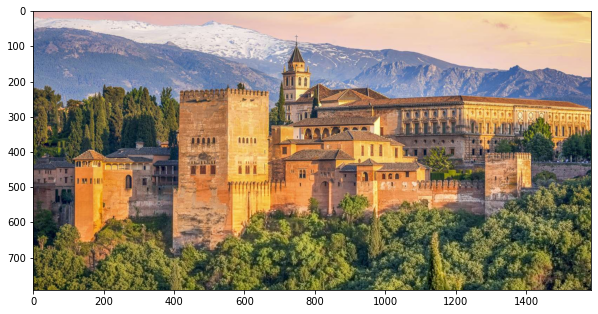

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 8))
plt.imshow(im[:, :, [2, 1, 0]])